In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import mixture

0    16258
1     1639
Name: 0, dtype: int64

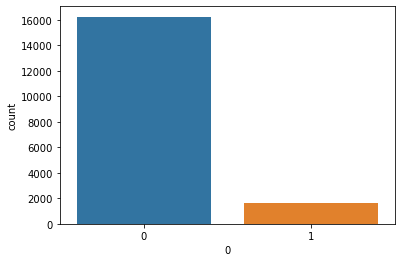

In [7]:
# Dataset source:
# http://archive.ics.uci.edu/ml/datasets/HTRU2#

# Read in data
data = pd.read_csv('../data/HTRU_2.csv', sep=',')
sns.countplot(data.iloc[:,-1]) # plot number of things with each value

data.iloc[:,-1].value_counts(sort=True)

In [8]:
# Create training, testing, and validation sets

X = data.drop(data.columns[-1], axis=1) # last value is the pulsar indicator

y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # 80/20

# scale so it converges
scaling = MinMaxScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

enc = OneHotEncoder(categories='auto')
y_train = enc.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test = enc.transform(y_test.values.reshape(-1, 1)).todense()

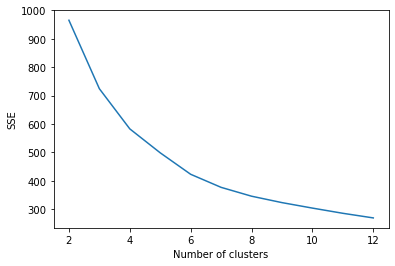

In [9]:
# Clustering algorithms 
# K-Means
# used https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

# How to choose the # of clusters
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
scores = {'sil': [], 'var': [], 'n_clusters': []}

sse = {}
for c in clusters:
    kmeans = KMeans(n_clusters=c, random_state=42)
    kmeans.fit(x_train)
    # these are the labels
    y_kmeans_pred=kmeans.predict(x_test)


    centers = kmeans.cluster_centers_
    #plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    #plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    

    #Silhouette score
    silhouette = metrics.silhouette_score(x_test, y_kmeans_pred, metric='euclidean')
    scores['n_clusters'].append(c)
    scores['sil'].append(silhouette)
    #Variance
    variance = kmeans.score(x_test)
    scores['var'].append(variance)


# elbow
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

    sse[c] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# k=6 appears to be the elbow
# EM
# looked at https://www.kaggle.com/charel/learn-by-example-expectation-maximization
